# Лабораторная работа 2

### Вариант 13

Аминов С.С.
М8О-408Б-19

Целью работы является исследование свойств линейной нейронной сети и алгоритмов ее обучения, применение сети в задачах аппроксимации и фильтрации.

In [103]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

Функции и переменные

In [104]:
def in1(t):
    return np.sin(np.sin(t) * t**2 - t)

def in2(t):
    return np.sin(-5*t**2 + 10*t - 5)

def out(t):
    return np.sin(-5*t**2 + 10*t - 5 - np.pi) / 3

h = 0.01

t1 = (1, 4.5)
t2 = (0, 2.5)

D = 5
ans_x = np.arange(t1[0],t1[1] + h, h)
ans = in1(ans_x)

Создадим датасет

In [105]:
x = [ans[i:i+D].tolist() for i in range(0, len(ans) - D)]
y = [ans[i] for i in range(D, len(ans))]

Создадим модель

In [106]:
model =  keras.Sequential([
        layers.Dense(1,input_dim=D, activation="linear"),
    ]
)

Компилируем

In [107]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

Тренируем

In [108]:
train = model.fit(x, y, batch_size=1, epochs=50)

Epoch 1/50
346/346 [==============================] - 0s 804us/step - loss: 0.3697 - mae: 0.5071
Epoch 2/50
346/346 [==============================] - 0s 810us/step - loss: 0.0198 - mae: 0.1090
Epoch 3/50
346/346 [==============================] - 0s 919us/step - loss: 0.0054 - mae: 0.0513
Epoch 4/50
346/346 [==============================] - 0s 814us/step - loss: 0.0035 - mae: 0.0425
Epoch 5/50
346/346 [==============================] - 0s 812us/step - loss: 0.0028 - mae: 0.0393
Epoch 6/50
346/346 [==============================] - 0s 808us/step - loss: 0.0023 - mae: 0.0366
Epoch 7/50
346/346 [==============================] - 0s 813us/step - loss: 0.0019 - mae: 0.0332
Epoch 8/50
346/346 [==============================] - 0s 807us/step - loss: 0.0015 - mae: 0.0299
Epoch 9/50
346/346 [==============================] - 0s 807us/step - loss: 0.0012 - mae: 0.0269
Epoch 10/50
346/346 [==============================] - 0s 808us/step - loss: 8.9784e-04 - mae: 0.0242
Epoch 11/50
346/346 [====

Получим веса

In [109]:
model.layers[0].get_weights()

[array([[-0.37754968],
        [ 0.61725956],
        [-0.722485  ],
        [ 0.11632448],
        [ 1.3494202 ]], dtype=float32),
 array([0.00846515], dtype=float32)]

Графики loss и mae

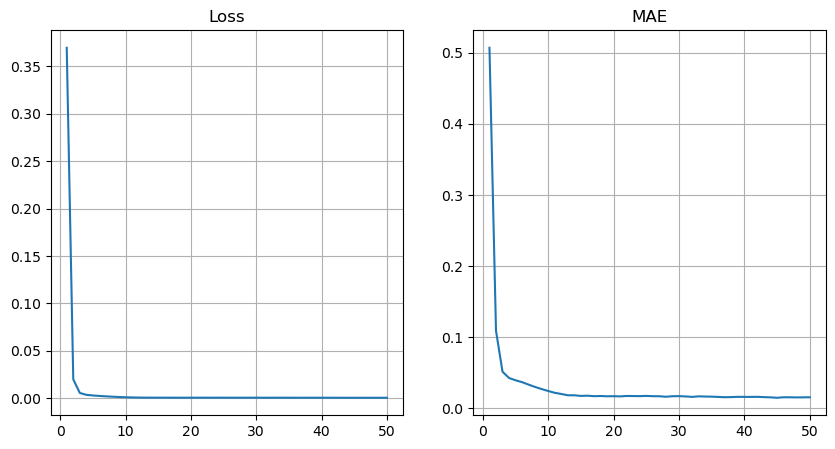

In [110]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
loss = train.history['loss']
plt.plot(range(1, len(loss) + 1), loss)
plt.grid()
plt.title('Loss')

plt.subplot(1, 2, 2)
loss = train.history['mae']
plt.plot(range(1, len(loss) + 1), loss)
plt.grid()
plt.title('MAE')

plt.show()

Результат работы модели

11/11 [==============================] - 0s 900us/step


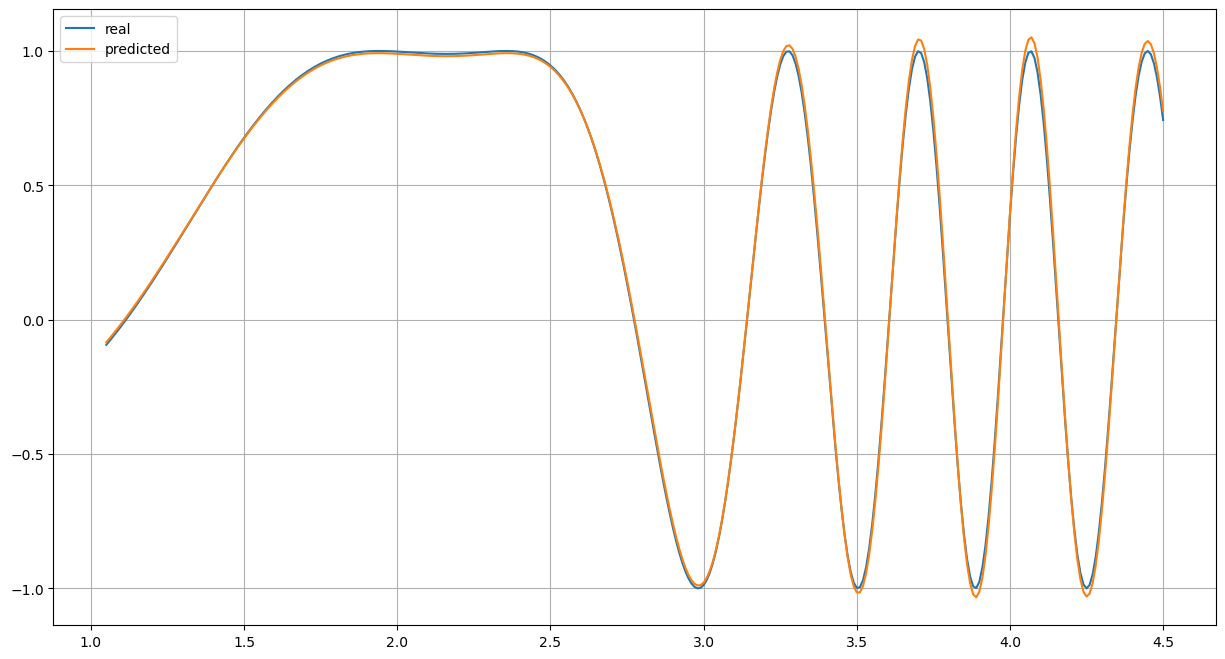

In [113]:
plt.figure(figsize=(15, 8))

plt.plot(ans_x[5:], ans[5:], label='real')
plt.plot(ans_x[5:], model.predict(x), label='predicted')
plt.legend()
plt.grid()
plt.show()

### Часть 2

In [89]:
x_points = np.arange(t2[0], t2[1] + h, h)
noize = in2(x_points)
real = out(x_points)
D = 4

Датасет

In [90]:
x = [noize[i:i+D].tolist() for i in range(0, len(noize) - D)]
y = [real[i] for i in range(D, len(real))]

Создаём модель

In [91]:
model2 =  keras.Sequential([
        layers.Dense(1,input_dim=D, activation="linear"),
    ]
)

Компилируем

In [92]:
model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

Тренеруем

In [93]:
train2 = model2.fit(x, y, batch_size=1, epochs=50)

Epoch 1/50
247/247 [==============================] - 0s 820us/step - loss: 2.7403 - mae: 1.3976
Epoch 2/50
247/247 [==============================] - 0s 802us/step - loss: 1.4826 - mae: 1.0190
Epoch 3/50
247/247 [==============================] - 0s 804us/step - loss: 0.7449 - mae: 0.7166
Epoch 4/50
247/247 [==============================] - 0s 818us/step - loss: 0.3481 - mae: 0.4849
Epoch 5/50
247/247 [==============================] - 0s 810us/step - loss: 0.1542 - mae: 0.3208
Epoch 6/50
247/247 [==============================] - 0s 795us/step - loss: 0.0686 - mae: 0.2096
Epoch 7/50
247/247 [==============================] - 0s 844us/step - loss: 0.0326 - mae: 0.1392
Epoch 8/50
247/247 [==============================] - 0s 806us/step - loss: 0.0171 - mae: 0.0994
Epoch 9/50
247/247 [==============================] - 0s 808us/step - loss: 0.0098 - mae: 0.0747
Epoch 10/50
247/247 [==============================] - 0s 803us/step - loss: 0.0061 - mae: 0.0594
Epoch 11/50
247/247 [========

Получим веса

In [94]:
model2.layers[0].get_weights()

[array([[ 0.5658506 ],
        [-0.731285  ],
        [ 0.11917192],
        [-0.2715786 ]], dtype=float32),
 array([0.00415753], dtype=float32)]

Графики loss и mae

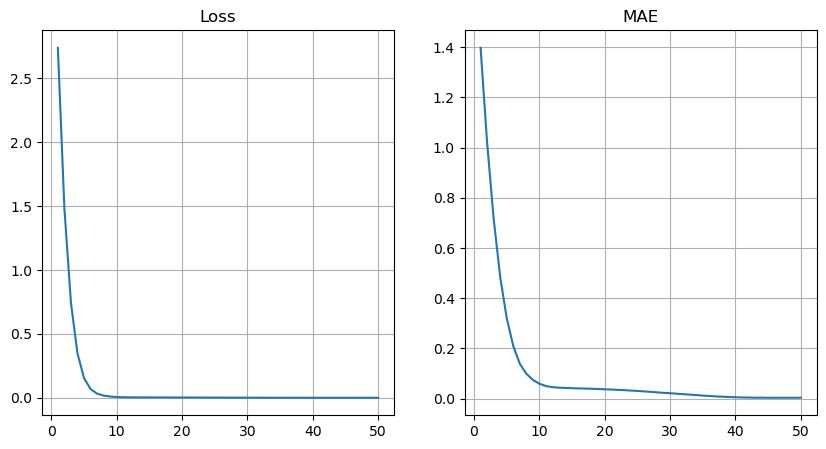

In [95]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
loss = train2.history['loss']
plt.plot(range(1, len(loss) + 1), loss)
plt.grid()
plt.title('Loss')

plt.subplot(1, 2, 2)
loss = train2.history['mae']
plt.plot(range(1, len(loss) + 1), loss)
plt.grid()
plt.title('MAE')

plt.show()

Результат работы

8/8 [==============================] - 0s 857us/step


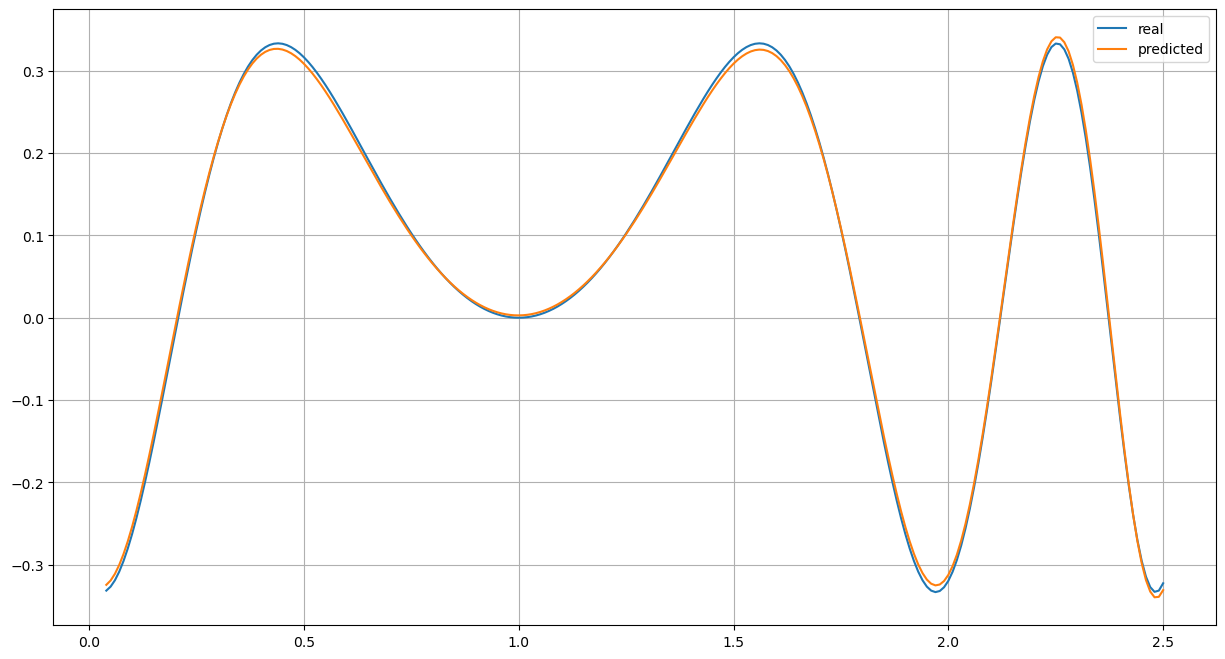

In [101]:
plt.figure(figsize=(15, 8))

plt.plot(x_points[D:], y, label='real')
plt.plot(x_points[D:], model2.predict(x).flatten(), label='predicted')
plt.legend()
plt.grid()
plt.show()

### Вывод

В данной лабораторной работе я потренировался в обучении перцептронов для предсказания следующего значения последовательности и получил хорошие результаты.